**ATIVIDADE PROPOSTA**

* Elaborar um modelo preditivo utilizando redes neurais com o TensorFlow para calcular a conversão de valores de temperatura em Celsius para Fahrenheit;
* Apresentar como saída as estatísticas do treinamento e uma tabela comparativa de valores calculados pelo modelo e valores reais;

1 - Para desenvolvimento do projeto, foi necessário instalar Tensorflow e importação das bibliotecas:

* Tensorflow para criação do modelo
* Numpy para criação de arrays;
* Pandas para criação da Tabela (Dataframe);
* Matplotlib para criação de gráfico;
* Função Mean Absolute Error da biblioteca Scikitlearn para visualização do Erro Médio Absoluto do modelo(MAE).

In [ ]:
# Etapa 1: Instalação Tensorflow e importação das bibliotecas
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

2 - Dados para treinamento do Modelo

Para criação dos dados de treinamento do modelo, foi utilizada a biblioteca Numpy e a utilização da função “np.array” para criação dos dados:

In [ ]:
# Etapa 2: Criação dos dados de treinamento
graus_celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
graus_fahrenheit = np.array([-40, 14, 32, 46.4, 59, 71.6, 100], dtype=float)

3 - Construção do modelo

<div style="text-align: justify">O trecho de código descrito abaixo, define e compila um modelo de rede neural simples utilizando a API Keras do TensorFlow. O modelo é do tipo sequencial e possui apenas uma camada densa (totalmente conectada), ideal para tarefas de regressão linear, como conversão de graus Celsius para Fahrenheit. A camada possui um único neurônio (units=1) com inicialização do peso “kernel_initializer” com média 1.8 e desvio padrão 0.1, e o viés “bias_initializer” fixado em 32, valores que correspondem à fórmula de conversão entre as duas escalas de temperatura. O otimizador escolhido é o SGD (gradiente descendente estocástico) com taxa de aprendizado de 0.001 e “momentum” de 0.9, que ajuda a acelerar a convergência e reduzir oscilações. O modelo é então compilado com a função de perda “mean_squared_error” (erro quadrático médio) e a métrica “mae” (erro absoluto médio) para avaliação durante o treinamento.</div>

In [ ]:
# Etapa 3: Construção do modelo
# Criação de um modelo sequencial com uma única camada densa
modelo = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)), # Define que a entrada será unidimensional
    # Adiciona uma camada densa com 1 unidade (neurônio)
    tf.keras.layers.Dense(
        units=1,
        # Inicialização dos pesos com média 1.8 e desvio padrão 0.1
        kernel_initializer=tf.keras.initializers.RandomNormal(mean=1.8, stddev=0.1),
        # Inicialização do viés como constante 32 (valor fixo na fórmula C×1.8 + 32)
        bias_initializer=tf.keras.initializers.Constant(32)
    )
])
# Definição do otimizador como Gradiente Descendente Estocástico (SGD)
# com uma taxa de aprendizado pequena e momentum para melhorar a estabilidade da descida
optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.001, # taxa de aprendizado
    momentum=0.9 # momentum para suavizar e acelerar o treinamento
)
# Compilação do modelo
modelo.compile(
    optimizer=optimizer,
    loss='mean_squared_error', # função de perda 'mean_squared_error' (erro quadrático médio)
    metrics=['mae'] # métrica adicional 'mae' (erro absoluto médio) para monitorar a performance
)

3 - Treinamento do Modelo

<div style="text-align: justify"> O código realiza o treinamento do modelo previamente definido, utilizando os dados de entrada (graus_celsius) e os valores correspondentes em Fahrenheit (graus_fahrenheit). O método “fit” executa o processo de ajuste dos pesos e viéses do modelo por meio da otimização da função de perda ao longo de 200 épocas (iterações completas sobre os dados). O parâmetro “verbose=False” suprime a saída detalhada do progresso durante o treinamento, deixando a execução mais limpa. Ao final do processo, é exibida uma mensagem indicando que o treinamento foi concluído com sucesso.</div>

In [ ]:
# Etapa 4: Treinamento do modelo
treinamento = modelo.fit(
    graus_celsius, # Dados de entrada (X)
    graus_fahrenheit, # Valores-alvo (Y)
    epochs=200, # Número de épocas (repetições sobre todo o conjunto de dados)
    verbose=False # Desativa a exibição detalhada durante o treinamento
    )
# Mensagem indicando que o processo de treinamento foi finalizado
print("Treinamento Concluído...")

Treinamento Concluído...


<div style="text-align: justify">O trecho do código acessa diretamente os pesos (coeficiente) e o viés (intercepto) aprendidos pela camada densa do modelo treinado. Em um modelo de rede neural simples com apenas uma camada densa e uma unidade, o peso representa o multiplicador aplicado à entrada, enquanto o viés representa o valor somado ao resultado da multiplicação. Esses dois parâmetros são suficientes para definir a equação linear aprendida (no caso, a conversão de graus Celsius para Fahrenheit). O código extrai esses valores e os exibe formatados com quatro casas decimais.</div>

In [ ]:
# Acessa o peso (coeficiente multiplicador) aprendido pela primeira camada (índice 0)
# get_weights() retorna uma lista: [pesos, viéses]
# [0][0][0] acessa o primeiro valor do array de pesos, que é um valor escalar no nosso caso
peso = modelo.layers[0].get_weights()[0][0][0]
# Acessa o viés (valor somado) aprendido pela primeira camada
# [1][0] acessa o primeiro valor do array de viéses
viés = modelo.layers[0].get_weights()[1][0]
# Exibe o peso (multiplicador) com 4 casas decimais
print(f"\nPeso aprendido (multiplicador): {peso:.4f}")
# Exibe o viés (soma) com 4 casas decimais
print(f"Viés aprendido (soma): {viés:.4f}")


Peso aprendido (multiplicador): 1.7965
Viés aprendido (soma): 31.9599


<div style="text-align: justify">De acordo com os dados de saída, após o treinamento o modelo aprendeu os seguintes parâmetros: um peso (coeficiente angular) de aproximadamente 1.7965 e um viés (intercepto) de cerca de 31.9599. Esses valores estão bastante próximos dos coeficientes reais da equação de conversão entre graus Celsius e Fahrenheit, que são 1.8 (multiplicador) e 32 (soma constante), respectivamente. Isso demonstra que o modelo foi capaz de capturar de forma eficaz a relação linear existente entre as duas variáveis. O resultado é considerado positivo, pois confirma que o processo de treinamento resultou em uma representação fiel da função matemática esperada, com erro médio absoluto (MAE) mínimo nas previsões. Portanto, o modelo está adequado para realizar previsões precisas de temperatura em Fahrenheit a partir de valores em Celsius.</div>

4 - Plotagem do gráfico com as estatísticas de treinamento

<div style="text-align: justify">O trecho de código representado, tem como objetivo visualizar graficamente o desempenho do modelo durante o processo de treinamento. Para isso, são plotadas as métricas de erro quadrático médio (MSE) e erro médio absoluto (MAE) ao longo das épocas. Esse tipo de visualização permite analisar a taxa de aprendizagem do modelo, identificando se houve convergência e estabilidade na minimização da função de perda. Dessa forma, o gráfico serve como uma ferramenta de diagnóstico para avaliar a eficiência do treinamento e verificar se ajustes no modelo ou nos hiperparâmetros são necessários.</div>

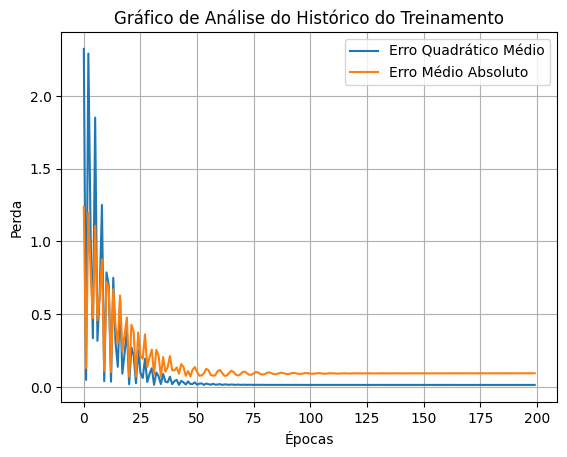

In [ ]:
# Etapa 5: Visualização do histórico de treinamento
# Plota a curva do erro quadrático médio (loss) registrado em cada época
plt.plot(treinamento.history['loss'],
         label='Erro Quadrático Médio')
# Plota a curva do erro médio absoluto (MAE) registrado em cada época
plt.plot(treinamento.history['mae'],
         label='Erro Médio Absoluto',
         )
plt.xlabel("Épocas") # Define o rótulo do eixo X como "Épocas"
plt.ylabel("Perda") # Define o rótulo do eixo Y como "Perda"
# Define o título do gráfico
plt.title("Gráfico de Análise do Histórico do Treinamento")
# Adiciona legenda para identificar as métricas
plt.legend()
# Adiciona uma grade para facilitar a leitura do gráfico
plt.grid(True)
# Exibe o gráfico
plt.show()

<div style="text-align: justify">O gráfico acima apresenta a análise do histórico de treinamento do modelo de regressão, demonstrando a evolução do erro ao longo de 200 épocas. As curvas representam duas métricas de avaliação: o Erro Quadrático Médio (MSE) em azul e o Erro Médio Absoluto (MAE) em laranja. Observa-se uma queda acentuada nos primeiros ciclos de treinamento, indicando um rápido aprendizado inicial por parte do modelo. A partir de aproximadamente 50 épocas, ambas as métricas estabilizam-se próximas de zero, sugerindo que o modelo convergiu adequadamente e atingiu um bom desempenho na minimização do erro. A ausência de oscilações excessivas nas etapas finais também indica que o processo de otimização ocorreu de forma estável e eficaz, refletindo uma boa capacidade de generalização do modelo.</div>


5 - Teste do modelo com outros valores de temperaturas

In [ ]:
# Etapa 6: Teste com novos valores
# 10 novos valores de entrada em Celsius para testar o modelo treinado
graus_celsius2 = np.array([-20, -5, 5, 10, 20, 25, 30, 35, 40, 50], dtype=float)

# Previsões para os novos valores
previsoes_modelo = modelo.predict(graus_celsius2)
# Fórmula de conversão para visualização na tabela e comparação das previsões do modelo
farh_reais = graus_celsius2 * 1.8 + 32

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Tabela de comparação de valores

In [ ]:
# Etapa 7: Tabela comparativa de resultados
# Tabela com os valores de entrada, a previsão do modelo e o valor real
resultados_df = pd.DataFrame({
    'Graus Celsius': graus_celsius2,
    'Previsão do Modelo': previsoes_modelo.flatten(),
    'Fahrenheit Real': farh_reais
})
# Tabela com os resultados
print(resultados_df)

   Graus Celsius  Previsão do Modelo  Fahrenheit Real
0          -20.0           -3.969255             -4.0
1           -5.0           22.977627             23.0
2            5.0           40.942215             41.0
3           10.0           49.924507             50.0
4           20.0           67.889099             68.0
5           25.0           76.871391             77.0
6           30.0           85.853683             86.0
7           35.0           94.835983             95.0
8           40.0          103.818275            104.0
9           50.0          121.782867            122.0


<div style="text-align: justify">A tabela acima compara os valores de temperatura em Graus Celsius com as respectivas previsões do modelo e os valores reais em Graus Fahrenheit. Os resultados evidenciam que o modelo treinado possui alta precisão, com as previsões se aproximando fortemente dos valores reais, apresentando diferenças mínimas, geralmente inferiores a 0,05 unidades.</div>

<div style="text-align: justify">Essa proximidade indica que o modelo aprendeu corretamente a relação linear entre Celsius e Fahrenheit, validando a eficácia do treinamento realizado. Portanto, a tabela reforça que o modelo é confiável para conversões dentro do intervalo analisado.</div>

<div style="text-align: justify">Para reforçar a exatidão do modelo foi construído o código que pode ser observado abaixo. O algoritmo calcula o Erro Médio Absoluto (MAE) entre os valores reais de temperatura em Fahrenheit e as previsões geradas pelo modelo treinado. O MAE é uma métrica de avaliação que mede a média das diferenças absolutas entre os valores previstos e os reais, fornecendo uma estimativa direta e interpretável do quão precisas são as previsões do modelo.</div>

In [ ]:
# Calcula o erro médio absoluto entre os valores reais e as previsões do modelo
mae = mean_absolute_error(
    farh_reais,
    previsoes_modelo
)
# Exibe o valor do erro médio absoluto com duas casas decimais
print(f"\nErro médio absoluto (MAE): {mae:.2f}")


Erro médio absoluto (MAE): 0.11


<div style="text-align: justify">O resultado obtido do MAE foi 0.11, o que significa que, em média, a diferença entre as previsões do modelo e os valores reais de temperatura é de apenas 0.11 graus Fahrenheit. Este valor extremamente baixo confirma que o modelo possui alta precisão e generalização, sendo capaz de representar corretamente a conversão entre graus Celsius e Fahrenheit. Esse desempenho confirma que os parâmetros aprendidos (peso e viés) capturaram com fidelidade a relação linear esperada na conversão de temperatura.</div>